### DQN Training for Minesweeper Solver


In [ ]:
import sys
print(sys.executable)

In [ ]:
!{sys.executable} -m pip install torch

In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Adjust the path to your src directory if needed.
sys.path.append(os.path.abspath('../src'))

# Import the training function from train.py
from train import train_agent
import matplotlib.pyplot as plt


Train the Agent and Capture Rewards

In [ ]:
# Set the number of episodes you want to train for
num_episodes = 500

# Train the agent and capture the rewards from each episode
episode_rewards = train_agent(num_episodes=num_episodes)

# Print a few results to verify
print("Training completed.")
print(f"Total episodes: {len(episode_rewards)}")


More Visualizations of the Training

Episode 1/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 2/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 3/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 4/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 5/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 6/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 7/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 8/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 9/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 10/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2, Tiles Revealed: 19, Epsilon: 1.000
Episode 11/1000 - Reward: 8.00, Win Rate: 0.000%, Steps: 2,

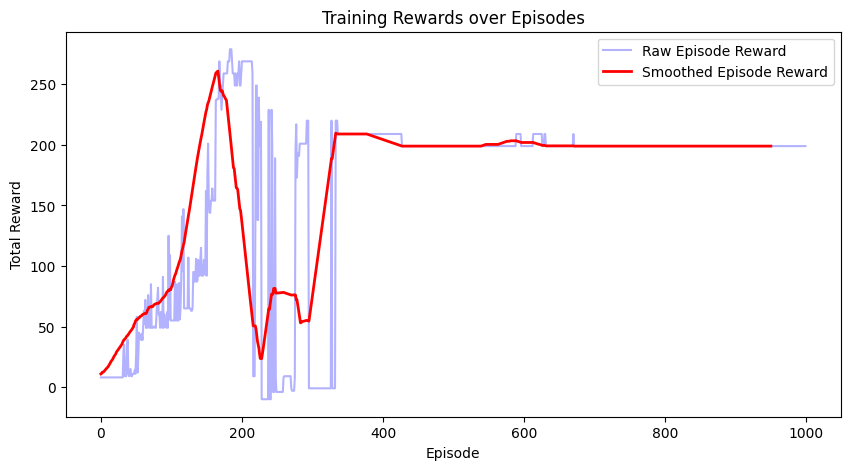

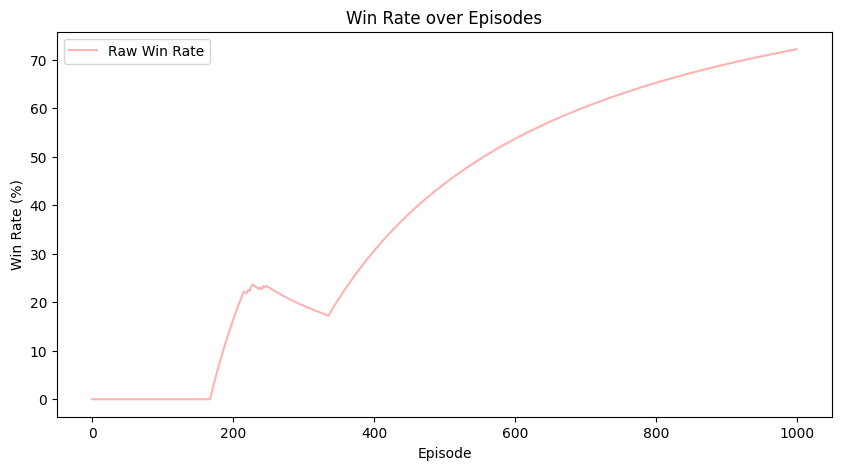

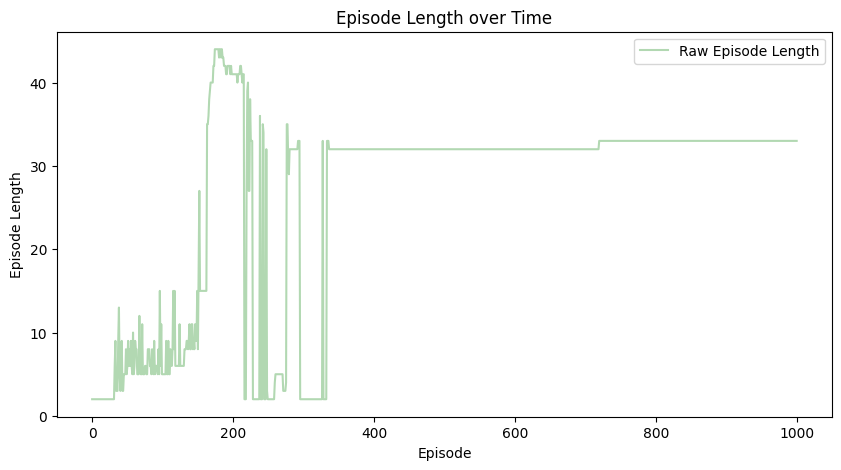

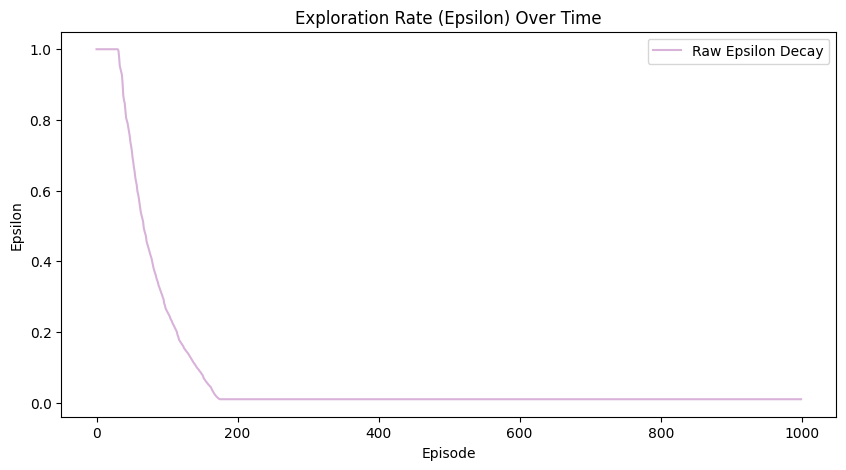

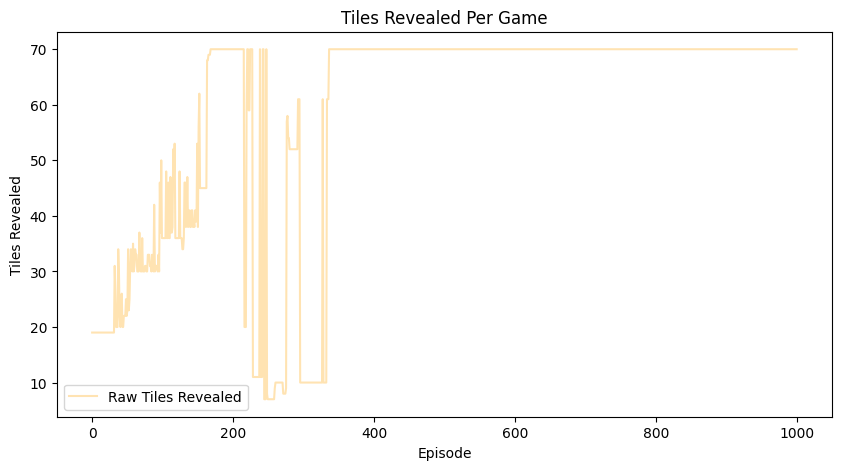

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Load the training results from train.py
from train import train_agent

# Run the training and get results
num_episodes = 1000
episode_rewards, win_rates, episode_lengths, exploration_rates, tiles_revealed = train_agent(num_episodes)

def moving_average(data, window_size=50):
    """
    Compute the moving average of a given data array.
    :param data: List of numerical values.
    :param window_size: The number of episodes to average over.
    :return: Smoothed list of values.
    """
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function to plot a graph
def plot_graph(x, y, xlabel, ylabel, title, color="blue", label=None, smooth_y=None):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color=color, alpha=0.3, label=f"Raw {label}" if label else None)  # Raw values (transparent)
    if smooth_y is not None:
        plt.plot(range(len(smooth_y)), smooth_y, color="red", linewidth=2, label=f"Smoothed {label}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if label:
        plt.legend()
    plt.show()

# **Training Rewards over Episodes (Raw + Smoothed)**
smoothed_rewards = moving_average(episode_rewards, window_size=50)
plot_graph(range(num_episodes), episode_rewards, "Episode", "Total Reward", 
           "Training Rewards over Episodes", color="blue", label="Episode Reward", smooth_y=smoothed_rewards)

# **Win Rate Over Episodes**
plot_graph(range(num_episodes), win_rates, "Episode", "Win Rate (%)", 
           "Win Rate over Episodes", color="red", label="Win Rate")

# **Episode Lengths Over Time (How long agent survives)**
plot_graph(range(num_episodes), episode_lengths, "Episode", "Episode Length", 
           "Episode Length over Time", color="green", label="Episode Length")

# **Exploration Rate (Epsilon) Over Time**
plot_graph(range(num_episodes), exploration_rates, "Episode", "Epsilon", 
           "Exploration Rate (Epsilon) Over Time", color="purple", label="Epsilon Decay")

# **Tiles Revealed Per Episode**
plot_graph(range(num_episodes), tiles_revealed, "Episode", "Tiles Revealed", 
           "Tiles Revealed Per Game", color="orange", label="Tiles Revealed")
